In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\Internships\Pantech\code\PhishingURLs\archive\dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

## data pre-processing

In [4]:
df.dropna(inplace=True)

In [5]:
print(df['status'].value_counts())

status
legitimate    5715
phishing      5715
Name: count, dtype: int64


In [6]:
mapping = {'legitimate':0, 'phishing':1}
df['status'] = df['status'].map(mapping)

df['status'].value_counts()

status
0    5715
1    5715
Name: count, dtype: int64

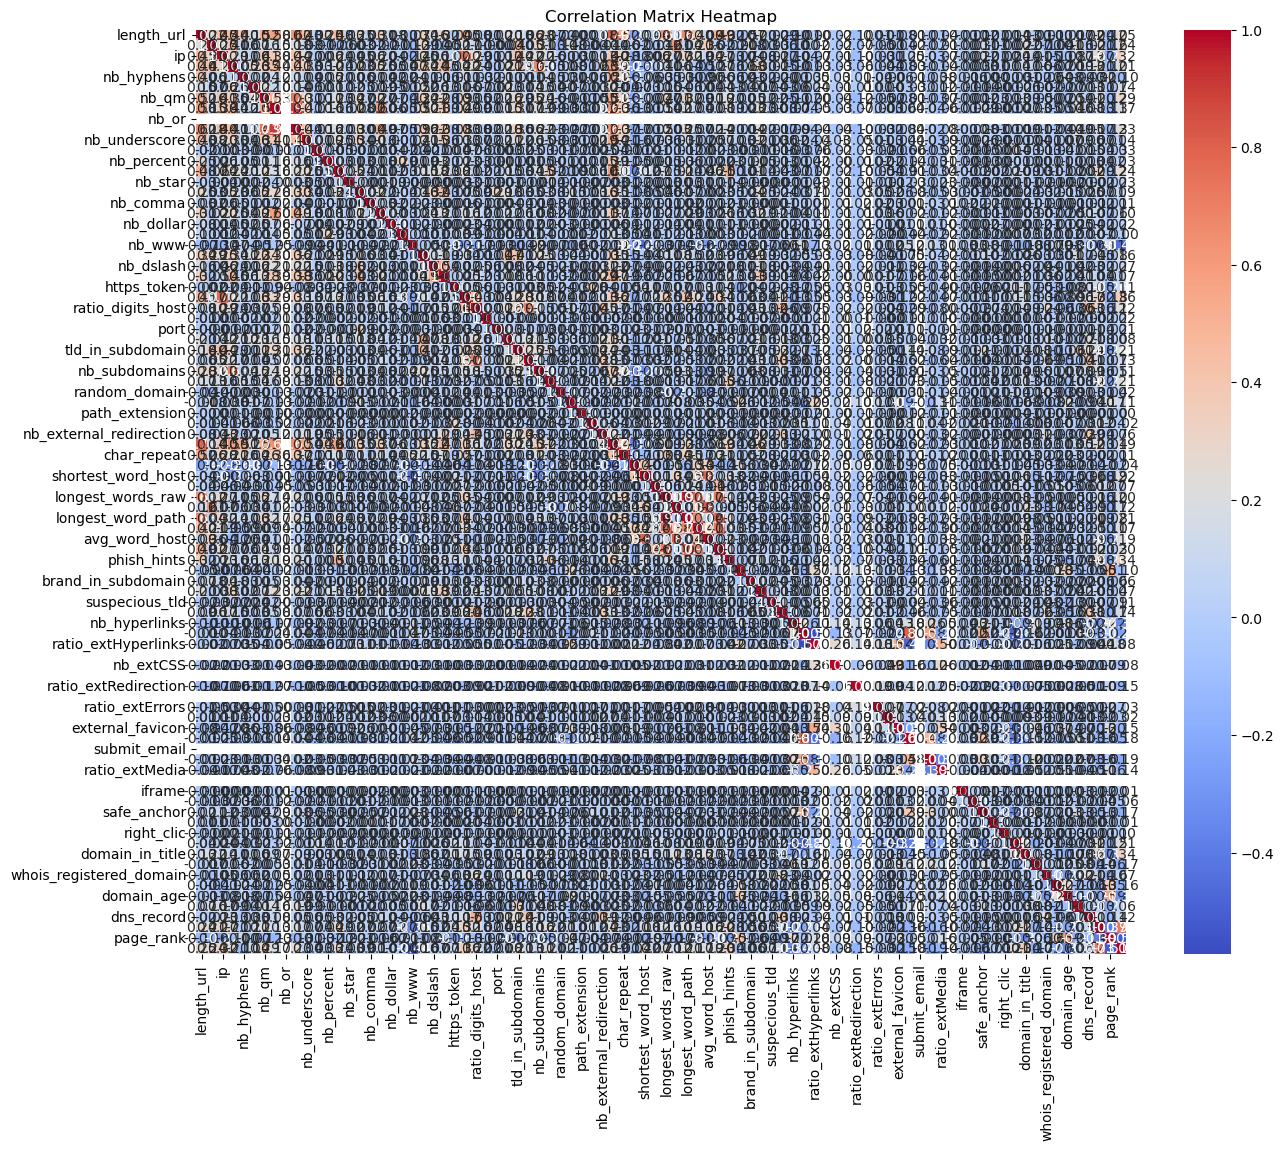

In [7]:
corr_matrix = df.corr(numeric_only=True)

# heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [8]:
corr_matrix

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
length_url,1.000000,0.223025,0.453961,0.443589,0.399564,0.150739,0.520930,0.576268,NaN,0.621745,...,0.125159,-0.006476,-0.007082,0.002799,-0.006798,0.072205,0.023357,0.236395,-0.102582,0.248580
length_hostname,0.223025,1.000000,0.252013,0.408956,0.057702,0.071793,0.162400,0.145617,NaN,0.183405,...,0.217284,0.074707,-0.097794,-0.041081,0.013854,0.163238,-0.023344,0.213990,-0.159342,0.238322
ip,0.453961,0.252013,1.000000,0.288398,0.109860,0.059401,0.405434,0.383262,NaN,0.440972,...,0.137716,0.014561,0.053246,-0.108869,-0.077020,0.167930,0.127823,0.270743,-0.218968,0.321698
nb_dots,0.443589,0.408956,0.288398,1.000000,0.045099,0.263283,0.347411,0.435798,NaN,0.414902,...,0.107789,0.055560,0.056407,-0.024117,-0.007818,0.087969,0.126659,0.209616,-0.097312,0.207029
nb_hyphens,0.399564,0.057702,0.109860,0.045099,1.000000,0.018770,0.036804,0.120487,NaN,0.107050,...,0.006909,0.020297,-0.055794,0.038163,0.080104,-0.041464,-0.031477,-0.018828,0.104341,-0.100107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
web_traffic,0.072205,0.163238,0.167930,0.087969,-0.041464,-0.009459,0.143777,0.164797,NaN,0.187809,...,0.081786,0.083888,0.022598,-0.110435,-0.096698,1.000000,-0.007113,0.034099,-0.209526,0.060388
dns_record,0.023357,-0.023344,0.127823,0.126659,-0.031477,0.031611,0.009441,0.076372,NaN,0.052159,...,0.062084,0.043817,0.213899,-0.060811,-0.068023,-0.007113,1.000000,0.096413,-0.142135,0.122119
google_index,0.236395,0.213990,0.270743,0.209616,-0.018828,0.113217,0.201260,0.129093,NaN,0.167385,...,0.267465,-0.143655,0.040633,-0.134656,-0.210111,0.034099,0.096413,1.000000,-0.389887,0.731171
page_rank,-0.102582,-0.159342,-0.218968,-0.097312,0.104341,-0.066356,-0.123852,-0.126164,NaN,-0.133089,...,-0.330810,0.058843,-0.155990,0.345751,0.589602,-0.209526,-0.142135,-0.389887,1.000000,-0.511137


In [9]:
target_corr = corr_matrix['status']
threshold=0.2
relevant_features = target_corr[abs(target_corr)>threshold].index.tolist()
print(relevant_features)

['length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_qm', 'nb_eq', 'nb_slash', 'nb_www', 'ratio_digits_url', 'ratio_digits_host', 'tld_in_subdomain', 'prefix_suffix', 'shortest_word_host', 'longest_words_raw', 'longest_word_path', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'empty_title', 'domain_in_title', 'domain_age', 'google_index', 'page_rank', 'status']


### keep only relevant features

In [10]:
X = df[relevant_features]
X = X.drop('status', axis=1)
y = df['status']
X.head()

,length_url,length_hostname,ip,nb_dots,nb_qm,nb_eq,nb_slash,nb_www,ratio_digits_url,ratio_digits_host,...,longest_words_raw,longest_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,empty_title,domain_in_title,domain_age,google_index,page_rank
0,37,19,0,3,0,0,3,1,0.000000,0.0,...,11,6,0,17,0.529412,0,0,-1,1,4
1,77,23,1,1,0,0,5,0,0.220779,0.0,...,32,32,0,30,0.966667,0,1,5767,1,2
2,126,50,1,4,1,3,5,0,0.150794,0.0,...,17,17,0,4,1.000000,0,1,4004,1,0
3,18,11,0,2,0,0,2,0,0.000000,0.0,...,5,0,0,149,0.973154,0,1,-1,0,3
4,55,15,0,2,0,0,5,1,0.000000,0.0,...,11,11,0,102,0.470588,0,0,8175,0,6


## Models

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
from xgboost import XGBClassifier

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### Random Forest

In [14]:
rf = RandomForestClassifier()
rf.fit(X_train_scaled,y_train)

rf_predict = rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test,rf_predict)
print(accuracy)

0.9636920384951881


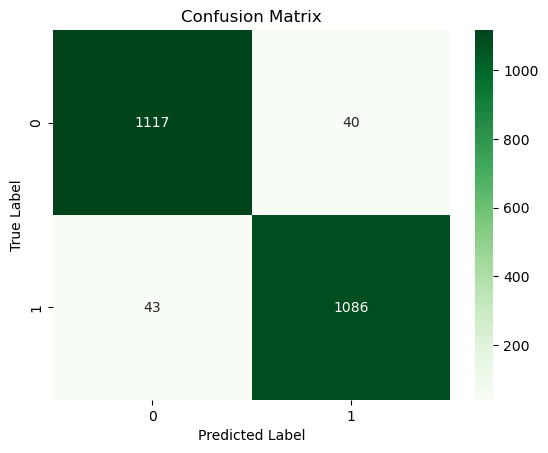

In [15]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)

sns.heatmap(rf_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [16]:
rf_report = classification_report(y_test,rf_predict)
print(rf_report)

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## SVM

In [17]:
svm = SVC()
svm.fit(X_train_scaled,y_train)

svm_predict = svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test,svm_predict)
print(accuracy)

0.9615048118985127


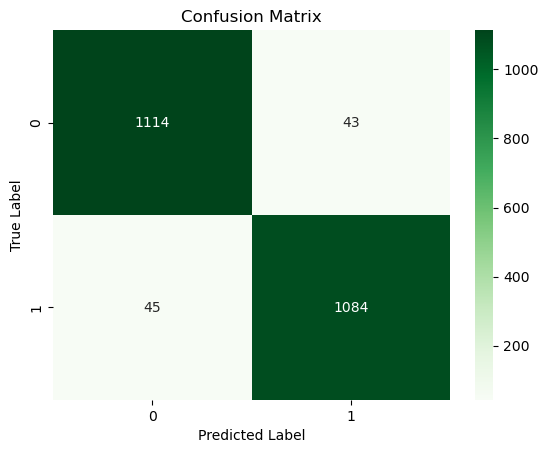

In [18]:
svm_conf_matrix = confusion_matrix(y_test,svm_predict)
sns.heatmap(svm_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1157
           1       0.96      0.96      0.96      1129

    accuracy                           0.96      2286
   macro avg       0.96      0.96      0.96      2286
weighted avg       0.96      0.96      0.96      2286



## decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

dt_predict = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_predict)
print(dt_accuracy)

0.9111986001749781


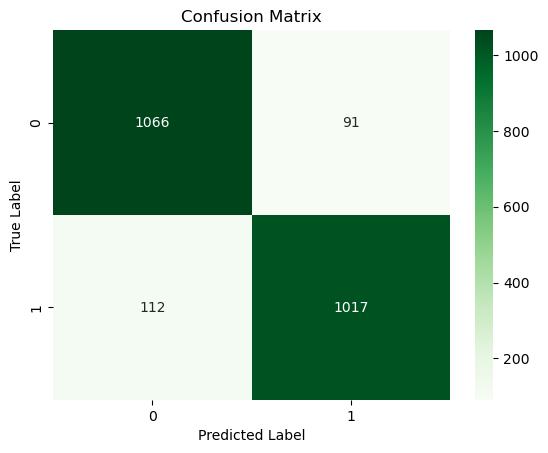

In [20]:
dt_conf_matrix = confusion_matrix(y_test,dt_predict)
sns.heatmap(dt_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
print(classification_report(y_test,dt_predict))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1157
           1       0.92      0.90      0.91      1129

    accuracy                           0.91      2286
   macro avg       0.91      0.91      0.91      2286
weighted avg       0.91      0.91      0.91      2286



## logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

lr_predict = lr.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predict)
print(lr_accuracy)

0.9391951006124234


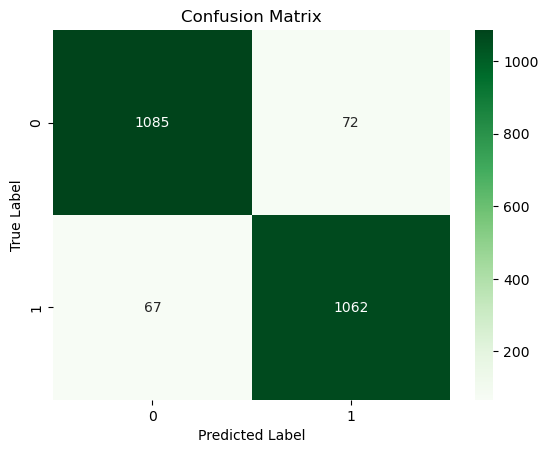

In [24]:
lr_conf_matrix = confusion_matrix(y_test,lr_predict)
sns.heatmap(lr_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1157
           1       0.94      0.94      0.94      1129

    accuracy                           0.94      2286
   macro avg       0.94      0.94      0.94      2286
weighted avg       0.94      0.94      0.94      2286



### comparing all models

In [28]:
accuracies = {
    'Random Forest': 0.9636920384951881, 
    'SVM': 0.9615048118985127,           
    'Decision Tree': 0.9111986001749781, 
    'Logistic Regression': 0.9391951006124234 
}

sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item: item[1]))
model_names = list(sorted_accuracies.keys())
accuracy_values = list(sorted_accuracies.values())

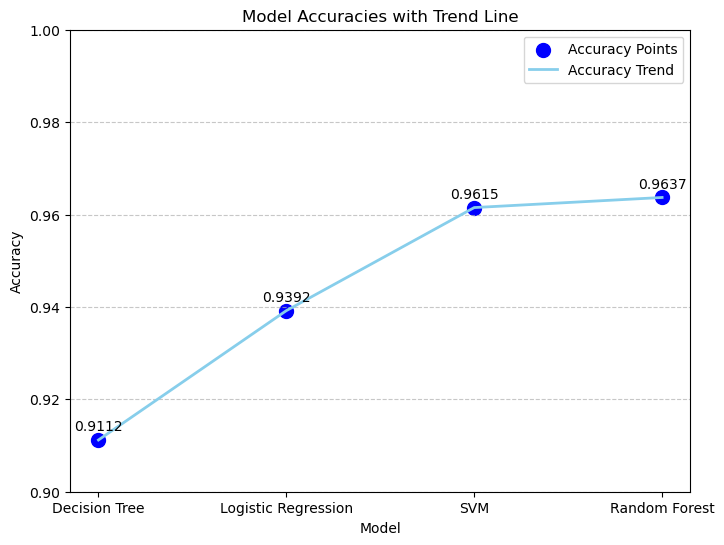

In [27]:
# scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(model_names, accuracy_values, color='blue', label='Accuracy Points', s=100)
plt.plot(model_names, accuracy_values, color='skyblue', linestyle='-', linewidth=2, label='Accuracy Trend')

# Add labels, title, and legend
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies with Trend Line')
plt.ylim(0.9, 1)  # Adjust the range to fit the accuracies
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

# Annotate points with accuracy values
for i, value in enumerate(accuracy_values):
    plt.text(i, value + 0.002, f"{value:.4f}", ha='center', fontsize=10)

plt.show()

# PHISHING URLs

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import sklearn.metrics as metrics
from scipy.stats import randint, uniform
import re
from sklearn.feature_extraction.text import CountVectorizer

In [31]:
df = pd.read_csv(r'D:\Internships\Pantech\code\PhishingURLs\archive\dataset_phishing.csv')
df.dropna(inplace=True)
df['status'] = df['status'].map({'legitimate': 0, 'phishing': 1})
X = df['url']  # URLs as features
y = df['status']  # Target

In [32]:
#transform URL str into numeric
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 4))
X_vectorized = vectorizer.fit_transform(X)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.926509186351706


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1143
           1       0.93      0.92      0.93      1143

    accuracy                           0.93      2286
   macro avg       0.93      0.93      0.93      2286
weighted avg       0.93      0.93      0.93      2286



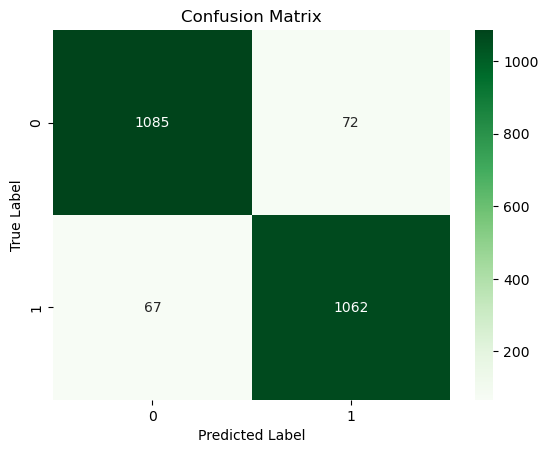

In [35]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(lr_conf_matrix,annot=True, fmt = 'd',cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [37]:
import joblib
joblib.dump(model, "phishing_url_model.pkl")
joblib.dump(vectorizer, "url_vectorizer.pkl")
print("Model and vectorizer saved!")

Model and vectorizer saved!


In [38]:
def predict_url(url):
    url_vectorized = vectorizer.transform([url])
    prediction = model.predict(url_vectorized)
    return "Phishing" if prediction[0] == 1 else "Legitimate"

In [39]:
test_url = "http://www.crestonwood.com/router.php"
print(f"The URL '{test_url}' is predicted as: {predict_url(test_url)}")

The URL 'http://www.crestonwood.com/router.php' is predicted as: Legitimate


In [40]:
test_url = "http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4"
print(f"The URL '{test_url}' is predicted as: {predict_url(test_url)}")

The URL 'http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4' is predicted as: Phishing


In [41]:
test_url = "http://example.com/suspicious"
print(f"The URL '{test_url}' is predicted as: {predict_url(test_url)}")

The URL 'http://example.com/suspicious' is predicted as: Phishing


In [42]:
test_url = "www.pes.edu"
print(f"The URL '{test_url}' is predicted as: {predict_url(test_url)}")

The URL 'www.pes.edu' is predicted as: Legitimate
